# Esame 16/01/2018

## 1.2:
Quante sono le istanze contenute nel dataset? _______ Il dataset è completo (cioè per ogni
istanza tutti i valori di attributo sono sempre specificati – non esistono “missing values”)?
_______ (punti 1).
Il dataset è bilanciato per quanto riguarda la classe da predire?

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data/BankMarketingDataSet.csv",sep=";")
df

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4115,30,admin.,married,basic.6y,no,yes,yes,1.4,93.918,-42.7,4.958,5228.1,no
4115,4116,39,admin.,married,high.school,no,yes,no,1.4,93.918,-42.7,4.959,5228.1,no
4116,4117,27,student,single,high.school,no,no,no,-1.8,92.893,-46.2,1.354,5099.1,no
4117,4118,58,admin.,married,high.school,no,no,no,1.4,93.444,-36.1,4.966,5228.1,no


In [2]:
df.shape[0]

4119

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4119 non-null   int64  
 1   age             4119 non-null   int64  
 2   job             4119 non-null   object 
 3   marital         4119 non-null   object 
 4   education       4119 non-null   object 
 5   default         4119 non-null   object 
 6   housing         4119 non-null   object 
 7   loan            4119 non-null   object 
 8   emp.var.rate    4119 non-null   float64
 9   cons.price.idx  4119 non-null   float64
 10  cons.conf.idx   4119 non-null   float64
 11  euribor3m       4119 non-null   float64
 12  nr.employed     4119 non-null   float64
 13  y               4119 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 450.6+ KB


In [5]:
df.groupby("y")["id"].count()

y
no     3668
yes     451
Name: id, dtype: int64

### Risposta:
1. 4119
2. No
3. Si è sbilanciato

## 1.3:
Visualizzare la distribuzione delle età in uno specifico diagramma

<AxesSubplot:>

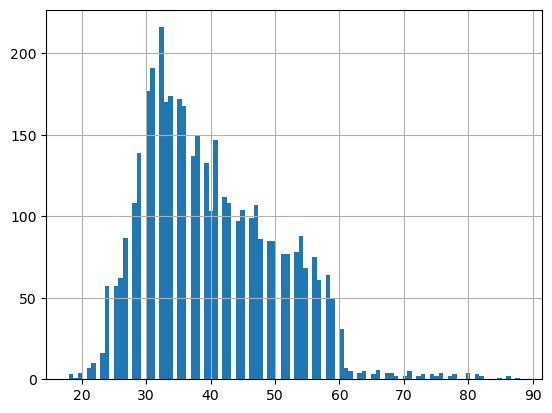

In [9]:
df["age"].hist(bins=100)

## 1.4:
Attraverso l’analisi del dataset è possibile ipotizzare se l’attributo “marital status” influisce
nella predizione? In che modo influisce? Giustificare la risposta.

<AxesSubplot:xlabel='y'>

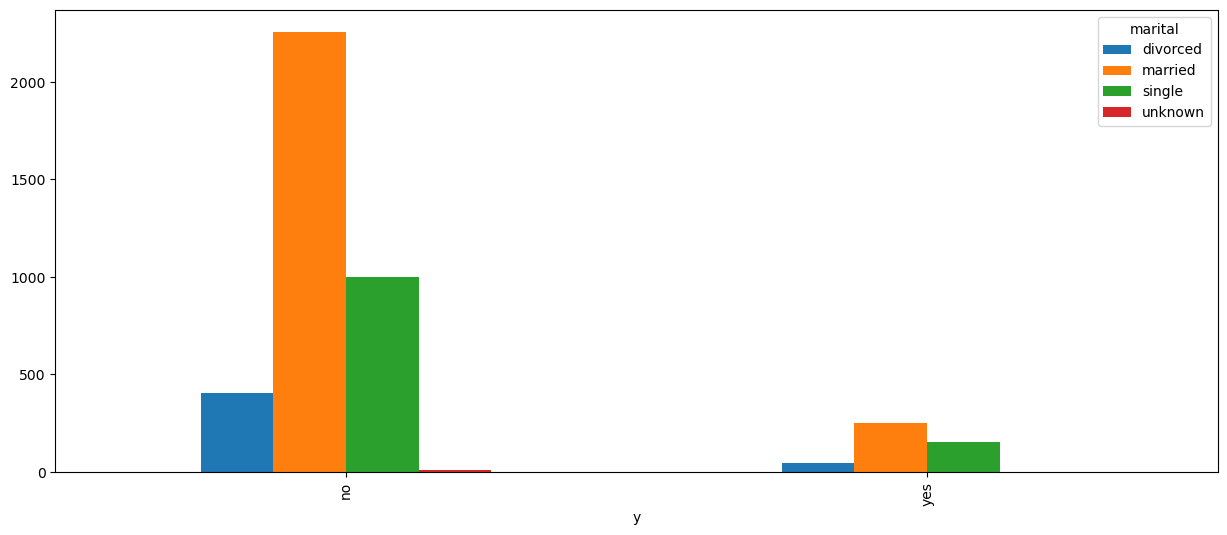

In [11]:
pd.pivot_table(df, 'age', index='y', columns='marital', aggfunc='count').plot(kind="bar",figsize=(15,6))

## Risposta:
La distribuzione dello stato matrimoniale nei due tipi di predizione rimane lo stesso.
Quindi l'attributo marital non sembra influire sulla predizione

## 1.5:
Calcolare una serie che rappresenti per ogni età la percentuale delle persone che hanno
sottoscritto un deposito. Calcolare poi una serie che rappresenti per ogni età la percentuale
delle persone che non hanno sottoscritto un deposito. Rappresentare graficamente le due serie
(anche in diagrammi distinti e effettuare considerazioni sul risultato ottenuto – se ne nascono)

In [13]:
df_no = df.loc[df.y == "no"]
df_yes = df.loc[df.y == "yes"]
df_no

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4115,30,admin.,married,basic.6y,no,yes,yes,1.4,93.918,-42.7,4.958,5228.1,no
4115,4116,39,admin.,married,high.school,no,yes,no,1.4,93.918,-42.7,4.959,5228.1,no
4116,4117,27,student,single,high.school,no,no,no,-1.8,92.893,-46.2,1.354,5099.1,no
4117,4118,58,admin.,married,high.school,no,no,no,1.4,93.444,-36.1,4.966,5228.1,no


In [22]:
age_no = (df_no.groupby("age")["id"].count() / len(df_no))*100
age_yes = (df_yes.groupby("age")["id"].count() / len(df_yes))*100
age_no

age
18    0.054526
19    0.027263
20    0.109051
21    0.109051
22    0.218103
        ...   
78    0.054526
80    0.027263
81    0.027263
85    0.027263
88    0.027263
Name: id, Length: 64, dtype: float64

Text(0.5, 1.0, 'si deposito')

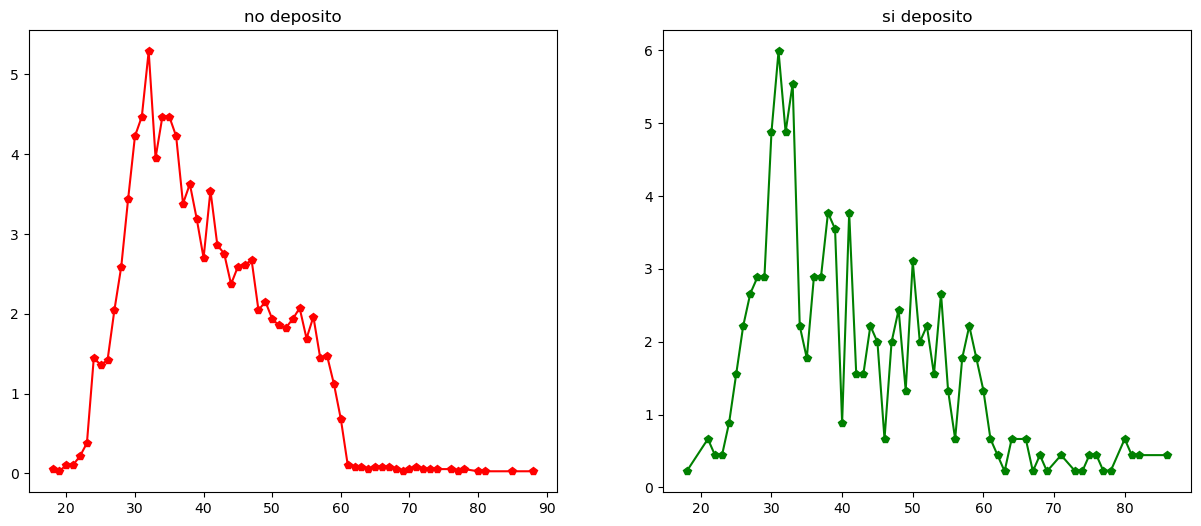

In [31]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2,figsize=(15,6))
ax[0].plot(age_no,'rp-',label="no deposito")
ax[1].plot(age_yes,'gp-',label="si deposito")

ax[0].set_title("no deposito")
ax[1].set_title("si deposito")